In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:


img = cv2.imread('watch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('watch.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()

In [ ]:
cv2.imwrite('watchgray.png',img)

In [ ]:
cap = cv2.VideoCapture(0)
print(cap.isOpened())
print(cap.get(3))
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'watch',(0,130), font, 1, (0,255,255), 2, cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
px = img[55,55]
img[55,55] = [255,255,255]
px = img[55,55]
print(px)
img[100:150,100:150] = [255,255,255]
print(img.shape)
print(img.size)
print(img.dtype)
watch_face = img[37:111,107:194]
img[0:74,0:87] = watch_face
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 500 x 250
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpeg')

add = cv2.add(img1,img2)

cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpeg')
weighted = cv2.addWeighted(img1, 0.2, img2, 0.8, 0)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load two images
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainlogo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# add a threshold
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)

mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('original',img)
cv2.imshow('Otsu threshold',threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('ben.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.imshow('Otsu threshold',threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('ben.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
lower_red = np.array([80,120,160])
upper_red = np.array([207,200,230])
    
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img,img, mask= mask)

cv2.imshow('img', img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('test.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])
    
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img,img, mask= mask)

kernel = np.ones((15,15),np.float32)/225
smoothed = cv2.filter2D(res,-1,kernel)

cv2.imshow('img', img)
cv2.imshow('mask',smoothed)

blur = cv2.GaussianBlur(res,(15,15),0)
cv2.imshow('Gaussian Blurring',blur)

median = cv2.medianBlur(res,15)
cv2.imshow('Median Blur',median)

bilateral = cv2.bilateralFilter(res,15,75,75)
cv2.imshow('bilateral Blur',bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

# TESTS AVEC CAMERA

In [ ]:
cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,1,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200)
    cv2.imshow('Edges',edges)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cv2.destroyAllWindows()
cap.release()

In [ ]:
img = cv2.imread('ben.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])
    
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img,img, mask= mask)

cv2.imshow('Original',img)
edges = cv2.Canny(img,100,200)
cv2.imshow('Edges',edges)


cv2.waitKey(0)
cv2.destroyAllWindows()

# Template matching

In [ ]:

img_rgb = cv2.imread('opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('opencv-template-for-matching.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

img_rgb = cv2.imread('ben.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('eyes.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Foreground Extraction

In [ ]:
img = cv2.imread('opencv-python-foreground-extraction-tutorial.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [ ]:
img = cv2.imread('ben.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (80,60,200,300)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

# Corner Detection

In [ ]:
img = cv2.imread('opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)
    
cv2.imshow('Corner',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Homography

[26.0, 33.0, 34.0, 36.0, 36.0, 36.0, 39.0, 39.0, 41.0, 42.0, 42.0, 42.0, 43.0, 43.0, 43.0, 44.0, 44.0, 45.0, 45.0, 46.0, 46.0, 46.0, 46.0, 47.0, 47.0, 47.0, 48.0, 49.0, 49.0, 49.0, 49.0, 49.0, 50.0, 50.0, 51.0, 51.0, 51.0, 51.0, 52.0, 52.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 54.0, 54.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 60.0, 61.0, 61.0, 62.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 68.0, 69.0, 69.0, 69.0, 71.0, 72.0, 76.0, 77.0, 79.0, 80.0, 82.0]


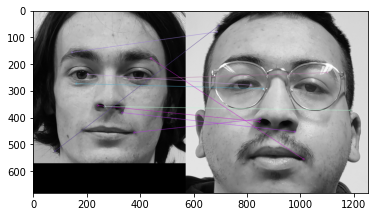

In [23]:
img1 = cv2.imread('face086.jpg',0)
img2 = cv2.imread('face080.jpg',0)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
print([key.distance for key in matches])
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

# Background Reduction

In [25]:
cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

# Haar Cascade Object Detection Face & Eye 

In [26]:
# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)
while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



# https://iq.opengenus.org/face-recognition-using-fisherfaces/



In [27]:
def pca (X , y , num_components =0) :
    [n , d] = X . shape
    if ( num_components <= 0) or ( num_components >n) :
        num_components = n
    mu = X. mean ( axis =0)
    X = X - mu
    if n > d:
        C = np . dot (X.T ,X)
        [ eigenvalues , eigenvectors ] = np . linalg . eigh (C)
    else :
        C = np . dot (X ,X .T)
        [ eigenvalues , eigenvectors ] = np . linalg . eigh (C)
        eigenvectors = np . dot (X .T , eigenvectors )
        for i in xrange (n):
            eigenvectors [: , i ] = eigenvectors [: , i ]/ np . linalg . norm ( eigenvectors [: , i ])
    # or simply perform an economy size decomposition
    # eigenvectors , eigenvalues , variance = np. linalg . svd (X.T, full_matrices = False )
    # sort eigenvectors descending by their eigenvalue
    idx = np . argsort ( - eigenvalues )
    eigenvalues = eigenvalues [ idx ]
    eigenvectors = eigenvectors [: , idx ]
    # select only num_components
    eigenvalues = eigenvalues [0: num_components ]. copy ()
    eigenvectors = eigenvectors [: ,0: num_components ]. copy ()
    return [ eigenvalues , eigenvectors , mu ]


In [28]:
def lda (X , y , num_components =0) :
    y = np . asarray (y)
    [n , d] = X . shape
    c = np . unique ( y)
    if ( num_components <= 0) or ( num_component >( len (c) -1) ):
        num_components = ( len (c) -1)
    meanTotal = X. mean ( axis =0)
    Sw = np . zeros ((d , d) , dtype = np . float32 )
    Sb = np . zeros ((d , d) , dtype = np . float32 )
    for i in c:
        Xi = X[ np . where (y == i) [0] ,:]
        meanClass = Xi . mean ( axis =0)
        Sw = Sw + np . dot (( Xi - meanClass ).T , ( Xi - meanClass ))
        Sb = Sb + n * np . dot (( meanClass - meanTotal ).T , ( meanClass - meanTotal ))
    eigenvalues , eigenvectors = np . linalg . eig ( np . linalg . inv ( Sw )* Sb )
    idx = np . argsort ( - eigenvalues . real )
    eigenvalues , eigenvectors = eigenvalues [ idx ] , eigenvectors [: , idx ]
    eigenvalues = np . array ( eigenvalues [0: num_components ]. real , dtype = np . float32 , copy =
    True )
    eigenvectors = np . array ( eigenvectors [0: ,0: num_components ]. real , dtype = np . float32 ,
    copy = True )
    return [ eigenvalues , eigenvectors ]


In [29]:
def fisherfaces (X ,y , num_components =0) :
    y = np . asarray (y)
    [n , d] = X . shape
    c = len ( np . unique (y ))
    [ eigenvalues_pca , eigenvectors_pca , mu_pca ] = pca (X , y , (n -c ))
    [ eigenvalues_lda , eigenvectors_lda ] = lda ( project ( eigenvectors_pca , X , mu_pca ) , y ,
    num_components )
    eigenvectors = np . dot ( eigenvectors_pca , eigenvectors_lda )
    return [ eigenvalues_lda , eigenvectors , mu_pca ]


In [30]:
class FisherfacesModel ( BaseModel ):
    def __init__ ( self , X= None , y= None , dist_metric = EuclideanDistance () , num_components
    =0) :
        super ( FisherfacesModel , self ). __init__ (X=X ,y=y , dist_metric = dist_metric ,
    num_components = num_components )
    def compute ( self , X , y):
        [D , self .W , self . mu ] = fisherfaces ( asRowMatrix (X ) ,y , self . num_components )
        # store labels
        self .y = y
        # store projections
    for xi in X :
        self . projections . append ( project ( self .W , xi . reshape (1 , -1) , self . mu ))


NameError: name 'BaseModel' is not defined